In [82]:
import openpyxl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

from matplotlib import pyplot as plt
import datetime
import math
import pandas as pd
from scipy import stats
import seaborn as sn

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

dataframe = pd.read_pickle('EGG_CLUSTER.pkl')
dataframe

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],NO,NO2,NOx,O3,PM10_conc,PM10-2.5_conc,PM2.5_conc,Air_Temperature,Relative_Humidity
Timestamp,,,,,,,,,,,,,,,,,,,
2020-05-06 16:00:00,21.903833,19.097667,1.157778,1.971667,2.184444,52.622278,1.424326,135.293611,1.422013,99140.855556,1.919000,5.137333,6.889833,40.594000,19.666000,15.035500,4.626500,12.851333,26.497000
2020-05-06 17:00:00,21.842556,18.681556,1.468889,2.380556,2.606667,53.220000,1.424310,119.157722,1.422116,99111.470556,2.494167,7.393667,9.502500,39.201833,21.422167,16.256500,5.165667,12.170000,27.646167
2020-05-06 18:00:00,18.759000,20.940722,1.906667,2.956111,3.228333,53.444944,1.424059,98.585667,1.422117,99124.263889,1.459167,10.763833,12.104500,35.107333,16.479000,11.466000,5.013333,11.409000,28.912333
2020-05-06 19:00:00,15.563167,24.689333,2.208333,3.385000,3.670000,53.140333,1.423810,91.635056,1.422015,99155.933889,0.409500,3.808167,4.204333,38.284333,13.103500,9.678500,3.426167,10.577667,26.920333
2020-05-06 20:00:00,14.101167,23.634556,1.337222,1.886111,2.019444,49.809222,1.423762,74.458889,1.422064,99214.011667,0.315500,4.448667,4.764667,36.122500,10.409333,7.162833,3.244000,9.082000,28.326833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-25 11:00:00,39.924556,30.432944,5.115000,6.662778,6.872778,73.049333,1.425910,121.291000,1.423404,99705.132778,0.365917,2.609533,2.975500,55.903200,19.268467,12.141783,7.127267,996.547950,30.645433
2020-05-25 12:00:00,39.951111,30.081556,6.773333,8.543889,8.806111,78.604889,1.425797,136.821444,1.423287,99701.504444,0.603183,6.032083,6.635250,56.402150,25.994967,14.871600,11.122967,996.351517,28.949983
2020-05-25 13:00:00,37.129333,35.702833,10.958889,14.503889,14.927222,81.051278,1.425383,124.142611,1.423120,99690.339444,0.628783,5.811367,6.428683,63.794417,30.028817,18.580050,11.447000,996.178783,28.876100


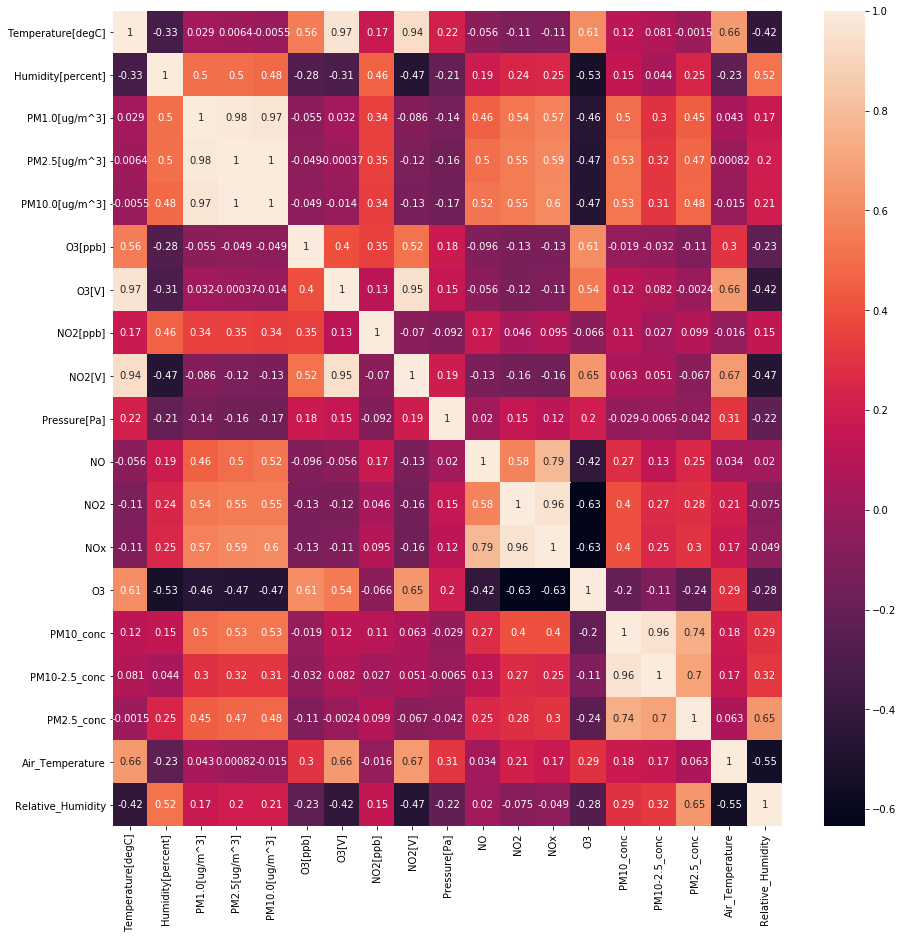

In [83]:
dataframe_new = dataframe
corrMatrix = dataframe_new.corr()
plt.subplots(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

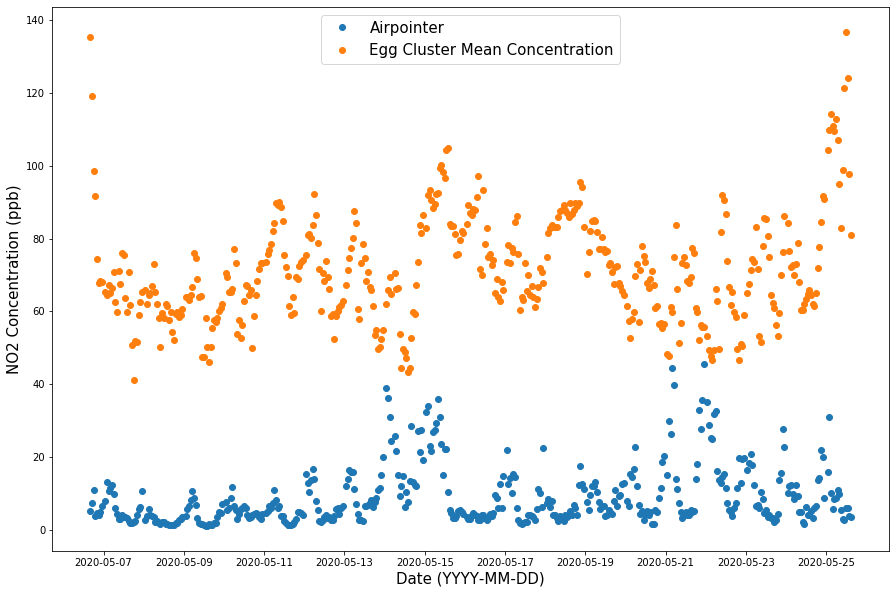

In [33]:
# Plot the time series graph
plt.figure(figsize=(15,10))
plt.plot(dataframe.index.to_series(), dataframe['NO2'], 'o', label='Airpointer')
plt.plot(dataframe.index.to_series(), dataframe['NO2[ppb]'], 'o',label="Egg Cluster Mean Concentration")
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('NO2 Concentration (ppb)', fontsize=15)
plt.legend(loc='best', fontsize=15)

0.0021359894410429847

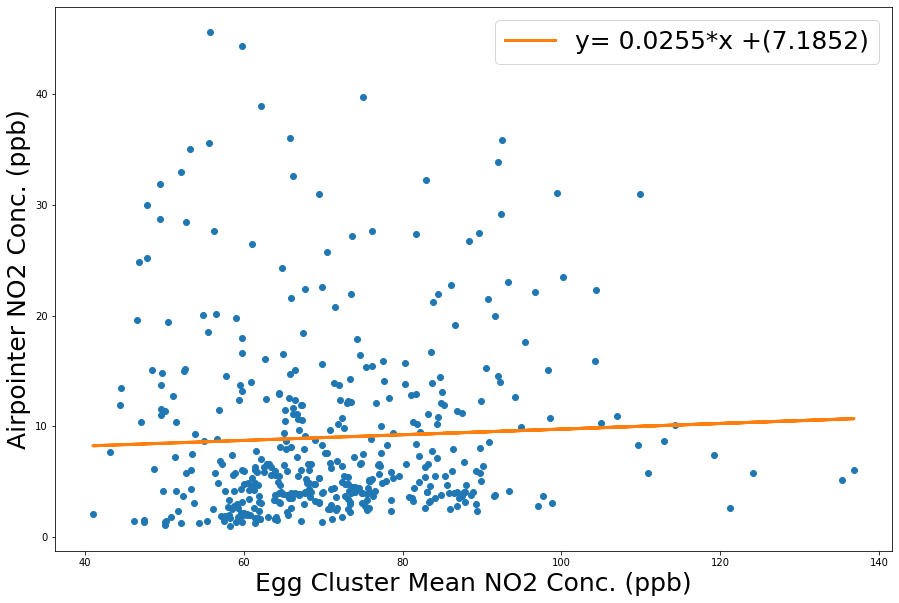

In [34]:
# Calculate a regression line
xValues = dataframe['NO2[ppb]'].to_numpy()
yValues = dataframe['NO2'].to_numpy()
# Calculate a regression line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('Egg Cluster Mean NO2 Conc. (ppb)', fontsize=25)
plt.ylabel('Airpointer NO2 Conc. (ppb)', fontsize=25)
plt.legend(loc='best', fontsize=25)

# Calculate the R2 score
metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1)))

In [66]:
# ------------------------ ALL OF THE MODEL'S PARAMETERS ------------------------
# Sensor measurements from the cluster
cluster_temp_inside_box = dataframe['Temperature[degC]'].to_numpy().reshape(-1,1)
cluster_humidity = dataframe['Humidity[percent]'].to_numpy().reshape(-1,1)
cluster_pm_1 = dataframe['PM1.0[ug/m^3]'].to_numpy().reshape(-1,1)
cluster_pm_25 = dataframe['PM2.5[ug/m^3]'].to_numpy().reshape(-1,1)
cluster_pm_10 = dataframe['PM10.0[ug/m^3]'].to_numpy().reshape(-1,1)
cluster_O3_conc = dataframe['O3[ppb]'].to_numpy().reshape(-1,1)
cluster_O3_vol = dataframe['O3[V]'].to_numpy().reshape(-1,1)
cluster_NO2_conc = dataframe['NO2[ppb]'].to_numpy().reshape(-1,1)
cluster_NO2_vol = dataframe['NO2[V]'].to_numpy().reshape(-1,1)
cluster_pressure = dataframe['Pressure[Pa]'].to_numpy().reshape(-1,1)
# Airpointer measurements
airpointer_NO = dataframe['NO'].to_numpy().reshape(-1,1)
airpointer_NO2 = dataframe['NO2'].to_numpy().reshape(-1,1)
airpointer_NOx = dataframe['NOx'].to_numpy().reshape(-1,1)
airpointer_O3 = dataframe['O3'].to_numpy().reshape(-1,1)
airpointer_pm10_conc = dataframe['PM10_conc'].to_numpy().reshape(-1,1)
airpointer_pm10_25 = dataframe['PM10-2.5_conc'].to_numpy().reshape(-1,1)
airpointer_pm25 = dataframe['PM2.5_conc'].to_numpy().reshape(-1,1)
airpointer_air_temperature = dataframe['Air_Temperature'].to_numpy().reshape(-1,1)
airpointer_relative_humidity = dataframe['Relative_Humidity'].to_numpy().reshape(-1,1)

In [93]:
# Build the DATA matrix
DATA = np.concatenate((cluster_temp_inside_box, 
                       cluster_humidity, 
                       cluster_pm_1, 
                       cluster_pm_25, 
                       cluster_pm_10,
                       cluster_O3_conc,
                       cluster_O3_vol,
#                        cluster_NO2_conc,
#                        cluster_NO2_vol,
                       cluster_pressure,
#                        airpointer_NO,
#                        airpointer_NOx,
                       airpointer_O3,
                       airpointer_pm10_conc,
                       airpointer_pm10_25,
                       airpointer_pm25,
                       airpointer_air_temperature,
                       airpointer_relative_humidity), 
                       axis=1)
# The target vector
target = airpointer_NO2

In [94]:
# Split the data into training and test sets
DATA_train, DATA_test, target_train, target_test = train_test_split(DATA, target, random_state=0)
# Simple Linear Regression method
elastic_net = ElasticNet(alpha=0.001, max_iter=1000000).fit(DATA_train, target_train)
print("Training set score: {:0.6f}".format(elastic_net.score(DATA_train, target_train)))
print("Test set score: {:0.6f}".format(elastic_net.score(DATA_test, target_test)))
print('MAE: {:0.4f}'.format(metrics.mean_absolute_error(target, elastic_net.predict(DATA))))
print('Estimator feature strengths: {}'.format(elastic_net.coef_))

Training set score: 0.760707
Test set score: 0.728740
MAE: 3.0840
Estimator feature strengths: [-0.16345406 -0.15410961  0.01150692  1.80711558 -1.72379791  0.24579455
 -0.          0.00307627 -0.60239854  1.05165552 -1.04237648 -0.1706206
  0.00651366  0.03975286]


0.7538802327442279

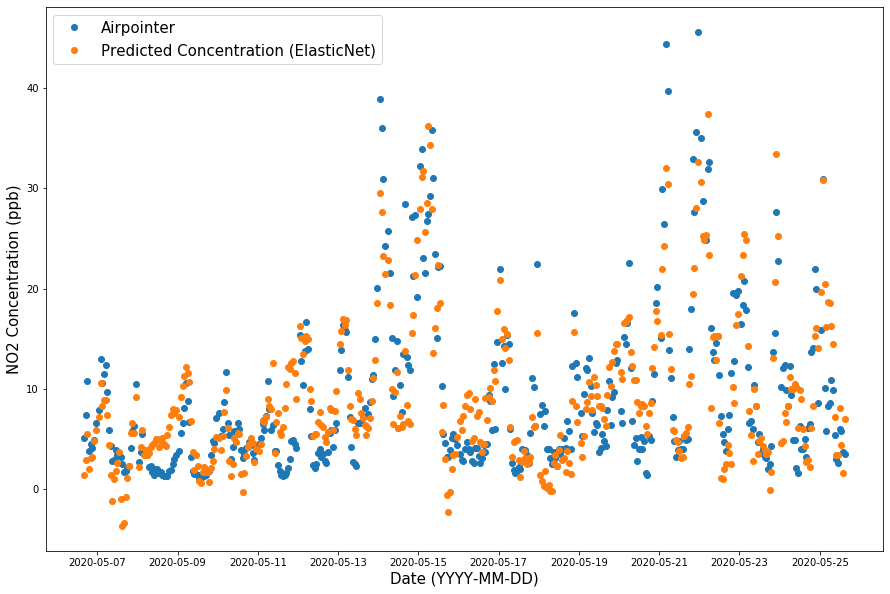

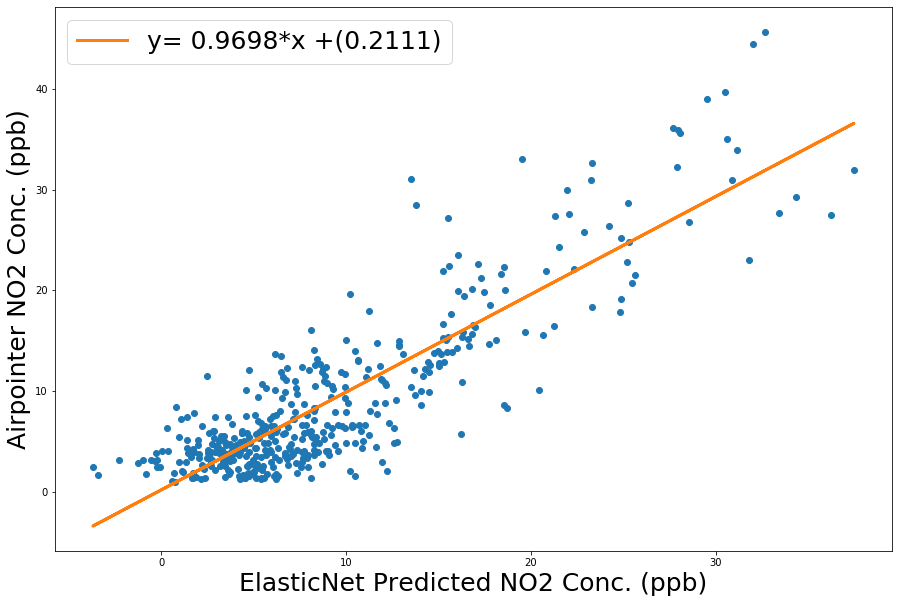

In [95]:
# Plot the time series graph
plt.figure(figsize=(15,10))
plt.plot(dataframe.index.to_series(), dataframe['NO2'], 'o', label='Airpointer')
plt.plot(dataframe.index.to_series(), elastic_net.predict(DATA), 'o',label="Predicted Concentration (ElasticNet)")
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('NO2 Concentration (ppb)', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate a regression line
xValues = elastic_net.predict(DATA).reshape(-1,1)
yValues = target
linear_regression = LinearRegression().fit(xValues, yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0][0], linear_regression.intercept_[0]),
         linewidth=3)
plt.xlabel('ElasticNet Predicted NO2 Conc. (ppb)', fontsize=25)
plt.ylabel('Airpointer NO2 Conc. (ppb)', fontsize=25)
plt.legend(loc='best', fontsize=25)

# Calculate the R2 score
metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1)))